<a href="https://colab.research.google.com/github/VilasKadam21/R-Programming-Project/blob/main/R_Programming_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **R Programming Project**

In [ ]:
### importing all important libraries  #########
#web scraping

library(rvest)
library(dplyr)

# **Collecting Data Using Web Scraping**

In [ ]:
##  Creating an empty dataframe  #######

final_df <- data.frame()

In [ ]:
#####   Coding for scraping required data from website with the help of web scraping    #############

for (i in 1:300) {
  url <- paste0("https://www.ambitionbox.com/list-of-companies?page=", i)
  page <- read_html(url)
  company <- page %>% html_nodes(".companyCardWrapper__companyDetails")

  company_name <- company %>% html_nodes("h2") %>% html_text() %>% trimws()
  Type <- company %>% html_nodes(".companyCardWrapper__interLinking") %>% html_text() %>% strsplit("\\|") %>% sapply(function(x) ifelse(length(x) >= 1, trimws(x[1]), ""))
  Rating <- company %>% html_nodes(".companyCardWrapper__companyRatingValue") %>% html_text() %>% trimws()
  Employees <- sapply(company %>% html_nodes(".companyCardWrapper__interLinking") %>% html_text() %>% strsplit("\\|"), function(x) ifelse(length(x) >= 2, trimws(x[2]), ""))
  Extra_Info <- sapply(company %>% html_nodes(".companyCardWrapper__interLinking") %>% html_text() %>% strsplit("\\|"), function(x) ifelse(length(x) >= 3, trimws(paste(x[3], x[4], sep = " and ")), ""))
  df <- data.frame(company_name = company_name, Type = Type, Rating = Rating, Employees = Employees, Extra_Info = Extra_Info)
  final_df <- rbind(final_df, df)
}

# **Exploratory Data Analysis:**

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
##### view first six rows of diamonds dataset
head(final_df)

,company_name,Type,Rating,Employees,Extra_Info
,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCS,IT Services & Consulting,3.8,1 Lakh+ Employees,Public and 55 years old
2,Accenture,IT Services & Consulting,4.1,1 Lakh+ Employees,Public and 34 years old
3,Cognizant,IT Services & Consulting,3.9,1 Lakh+ Employees,Forbes Global 2000 and 29 years old
4,Wipro,IT Services & Consulting,3.8,1 Lakh+ Employees,Public and 78 years old
5,ICICI Bank,Banking,4.0,1 Lakh+ Employees,Public and 29 years old
6,HDFC Bank,Banking,3.9,1 Lakh+ Employees,Public and 29 years old


In [ ]:
### summarize The Data:
summary(final_df)

 company_name           Type              Rating           Employees        
 Length:12000       Length:12000       Length:12000       Length:12000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  Extra_Info       
 Length:12000      
 Class :character  
 Mode  :character  

In [ ]:
#### display rows and columns [dimension of the data]
dim(final_df)


[1] 12000     5

In [ ]:
#### count total missing values in each column of the data:
sapply(final_df, function(x) sum(is.na(x)))

company_name         Type       Rating    Employees   Extra_Info 
           0            0            0            0            0

In [ ]:
######  As we can see due to some padding our datapoints are having unwanted extra
##  spaces so lets remove those to get neat and clean data

final_df[] <- lapply(final_df, function(x) gsub("[^[:alnum:]]+", " ", x))

In [ ]:
head(final_df, 10)

,company_name,Type,Rating,Employees,Extra_Info
,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCS,IT Services Consulting,3 8,1 Lakh Employees,Public and 55 years old
2,Accenture,IT Services Consulting,4 1,1 Lakh Employees,Public and 34 years old
3,Cognizant,IT Services Consulting,3 9,1 Lakh Employees,Forbes Global 2000 and 29 years old
4,Wipro,IT Services Consulting,3 8,1 Lakh Employees,Public and 78 years old
5,ICICI Bank,Banking,4 0,1 Lakh Employees,Public and 29 years old
6,HDFC Bank,Banking,3 9,1 Lakh Employees,Public and 29 years old
7,Infosys,IT Services Consulting,3 9,1 Lakh Employees,Public and 42 years old
8,Capgemini,IT Services Consulting,3 9,1 Lakh Employees,Public and 56 years old
9,Tech Mahindra,IT Services Consulting,3 7,1 Lakh Employees,Public and 37 years old


In [ ]:
#####  now all the extra spaces has removed but there is a problem created due to that,
#####  which is in Rating column rating was out of 5 and point is replaced with space,
#####  lets fix this problem.

final_df$Rating <- gsub(" ", ".", final_df$Rating)

In [ ]:
head(final_df, 10)

,company_name,Type,Rating,Employees,Extra_Info
,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCS,IT Services Consulting,3.8,1 Lakh Employees,Public and 55 years old
2,Accenture,IT Services Consulting,4.1,1 Lakh Employees,Public and 34 years old
3,Cognizant,IT Services Consulting,3.9,1 Lakh Employees,Forbes Global 2000 and 29 years old
4,Wipro,IT Services Consulting,3.8,1 Lakh Employees,Public and 78 years old
5,ICICI Bank,Banking,4.0,1 Lakh Employees,Public and 29 years old
6,HDFC Bank,Banking,3.9,1 Lakh Employees,Public and 29 years old
7,Infosys,IT Services Consulting,3.9,1 Lakh Employees,Public and 42 years old
8,Capgemini,IT Services Consulting,3.9,1 Lakh Employees,Public and 56 years old
9,Tech Mahindra,IT Services Consulting,3.7,1 Lakh Employees,Public and 37 years old


In [ ]:
#### Lets provide unique id to each row in the form of index

final_df$Index <- 1:nrow(final_df)
head(final_df)

,company_name,Type,Rating,Employees,Extra_Info,Index
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,TCS,IT Services Consulting,3.8,1 Lakh Employees,Public and 55 years old,1
2,Accenture,IT Services Consulting,4.1,1 Lakh Employees,Public and 34 years old,2
3,Cognizant,IT Services Consulting,3.9,1 Lakh Employees,Forbes Global 2000 and 29 years old,3
4,Wipro,IT Services Consulting,3.8,1 Lakh Employees,Public and 78 years old,4
5,ICICI Bank,Banking,4.0,1 Lakh Employees,Public and 29 years old,5
6,HDFC Bank,Banking,3.9,1 Lakh Employees,Public and 29 years old,6


In [ ]:
#######  you can see Index column is actually added to the last, lets move it to the first

final_df <- final_df %>% select(Index, everything())

In [ ]:
# lets check for unique types of companies:
unique(final_df$Type)

[1] "IT Services Consulting"                           
  [2] "Banking"                                          
  [3] "BPO"                                              
  [4] "Internet"                                         
  [5] "Telecom"                                          
  [6] "Software Product"                                 
  [7] "Engineering Construction"                         
  [8] "Retail"                                           
  [9] "NBFC"                                             
 [10] "10k 50k Employees"                                
 [11] "Management Consulting"                            
 [12] "EdTech"                                           
 [13] "Oil Gas"                                          
 [14] "Automobile"                                       
 [15] "Accounting Auditing"                              
 [16] "Analytics KPO"                                    
 [17] "Insurance"                                        
 [18] "Chemicals"                                        
 [19] "Pharma"                                           
 [20] "Building Material"                                
 [21] "FinTech"                                          
 [22] "FMCG"                                             
 [23] "Defence Aerospace"                                
 [24] "Financial Services"                               
 [25] "Logistics"                                        
 [26] "Recruitment"                                      
 [27] "Iron Steel"                                       
 [28] "Consumer Electronics Appliances"                  
 [29] "Healthcare"                                       
 [30] "Power"                                            
 [31] "Bengaluru Bangalore 33 more"                      
 [32] "Real Estate"                                      
 [33] "Emerging Technologies"                            
 [34] "Hospitality"                                      
 [35] "Auto Components"                                  
 [36] "1k 5k Employees"                                  
 [37] "Clinical Research"                                
 [38] "Industrial Automation"                            
 [39] "5k 10k Employees"                                 
 [40] "Industrial Machinery"                             
 [41] "Beverage"                                         
 [42] "Facility Management Services"                     
 [43] "Electrical Equipment"                             
 [44] "Metals Mining"                                    
 [45] "Biotechnology"                                    
 [46] "Agro Chemicals"                                   
 [47] "Aviation"                                         
 [48] "Non Profit"                                       
 [49] "Other"                                            
 [50] "Electronics Manufacturing"                        
 [51] "Food Processing"                                  
 [52] "Hardware Networking"                              
 [53] "Law Enforcement Security"                         
 [54] "Education Training"                               
 [55] "Noida 185 more"                                   
 [56] "Fashion Textile"                                  
 [57] "Media Entertainment"                              
 [58] "Railways"                                         
 [59] "Agriculture"                                      
 [60] "Fortune India 500"                                
 [61] "Packaging"                                        
 [62] "Pune 29 more"                                     
 [63] "Broadcasting"                                     
 [64] "Ports Shipping"                                   
 [65] "Bengaluru Bangalore 19 more"                      
 [66] "Printing Publishing"                              
 [67] "Bengaluru Bangalore 10 more"                      
 [68] "Noida 65 more"                                    
 [69] "Petrochemicals"                                   


In [ ]:
###### selection of true company types   ###############
values = c("IT Services Consulting", "Banking", "BPO", "Internet", "Telecom", "Software Product",
 "Engineering Construction", "Retail", "NBFC", "Management Consulting", "EdTech", "Oil Gas", "Automobile",
  "Accounting Auditing", "Analytics KPO", "Insurance", "Chemicals", "Pharma", "Building Material",
   "FinTech", "FMCG", "Defence Aerospace", "Financial Services", "Logistics", "Recruitment", "Iron Steel",
    "Consumer Electronics Appliances", "Healthcare", "Power", "Real Estate", "Emerging Technologies",
    "Hospitality", "Auto Components", "Clinical Research", "Industrial Automation", "Industrial Machinery",
     "Beverage", "Facility Management Services", "Electrical Equipment", "Metals Mining", "Biotechnology",
     "Non Profit", "Aviation", "Other", "Agro Chemicals", "Electronics Manufacturing", "Food Processing",
      "Hardware Networking", "Law Enforcement Security", "Education Training", "Fashion Textile",
      "Media Entertainment", "Railways", "Agriculture", "Printing Publishing", "Packaging", "Broadcasting",
      "Ports Shipping", "Architecture Interior Design", "Investment Banking Venture Capital Private Equity",
       "Furniture Furnishing", "Marketing Advertising", "Urban Transport", "Semiconductors", "Waste Management",
        "Beauty Personal Care", "Fitness Wellness", "Travel Tourism", "Medical Equipment", "Petrochemicals",
         "Sports Recreation", "Jewellery", "Government", "Legal", "Content Development", "Pulp Paper",
         "Chemicals Agri Inputs", "Import Export", "Gaming", "Animation VFX", "Leather", "Design", "Events")

In [ ]:
final_df$Type <- ifelse(final_df$Type %in% values, final_df$Type, NA)

In [ ]:
####  Grouping Top 10 types of companies by comapany counts:
library(dplyr)
grouped_data <- final_df %>%
  filter(!is.na(Type)) %>%
  group_by(Type) %>%
  summarise(Count = n())

top_10_groups <- grouped_data %>%
  arrange(desc(Count)) %>%
  slice(1:10)
print(top_10_groups)


# A tibble: 10 × 2
   Type                     Count
   <chr>                    <int>
 1 IT Services Consulting    1660
 2 Auto Components            614
 3 Engineering Construction   589
 4 Pharma                     486
 5 Industrial Machinery       473
 6 Healthcare                 406
 7 Financial Services         390
 8 Internet                   325
 9 Education Training         304
10 BPO                        252


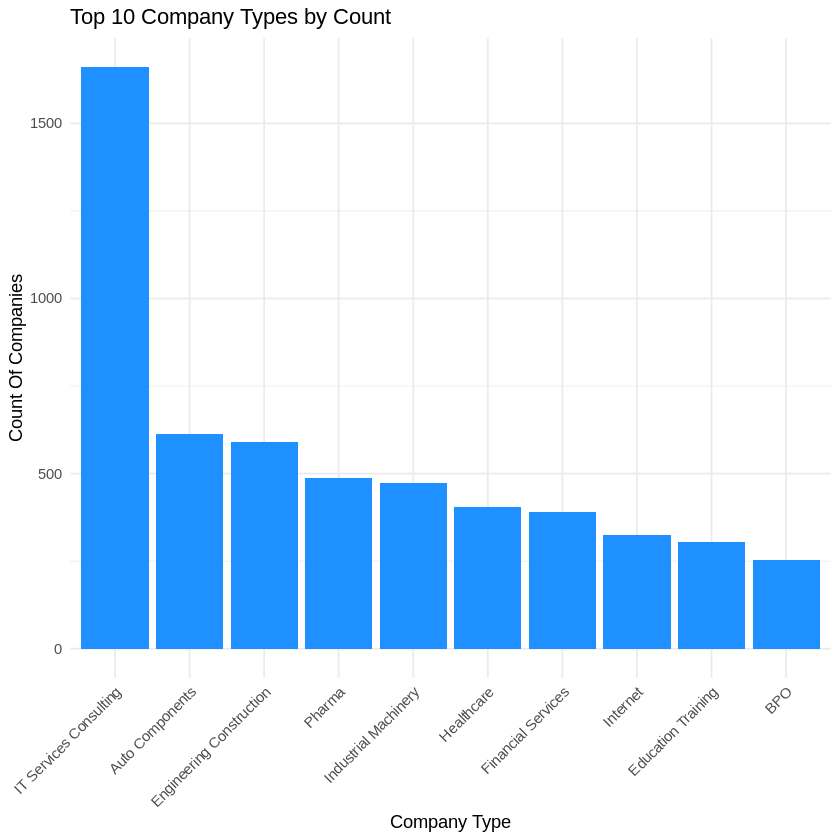

In [ ]:
###### As we have grouped Top 10 company types by the count of companies:
######  Lets plot it on Bar graph
library(ggplot2)

bar_plot <- ggplot(top_10_groups, aes(x = reorder(Type, -Count), y = Count)) +
  geom_bar(stat = "identity", fill = "dodgerblue") +
  labs(
    x = "Company Type",
    y = "Count Of Companies",
    title = "Top 10 Company Types by Count"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(bar_plot)


In [ ]:
##### Lets check which type of companies have got highest Ratings:
#####  Group of companies by Type and calculate the mean rating for each group
grouped_data <- final_df %>%
  group_by(Type) %>%
  summarise(Mean_Rating = mean(as.numeric(Rating), na.rm = TRUE))
top_10_groups <- grouped_data %>%
  arrange(desc(Mean_Rating)) %>%
  head(10)
print(top_10_groups)

# A tibble: 10 × 2
   Type                  Mean_Rating
   <chr>                       <dbl>
 1 Defence Aerospace            4.17
 2 Sports Recreation            4.12
 3 Government                   4.09
 4 Ports Shipping               4.07
 5 Retail                       4.06
 6 Agro Chemicals               4.06
 7 Hospitality                  4.05
 8 Non Profit                   4.04
 9 Chemicals Agri Inputs        4.04
10 NBFC                         4.03


In [ ]:
### Copy final_df in df for feature Engineering:
df = final_df

In [ ]:
##### Lets Encode Type feature using label encoding:
df_encoded <- df %>%
  mutate(Type = as.factor(Type)) %>%
  mutate(Type_Label_Encoded = as.integer(Type))

In [ ]:
head(df_encoded)

,Index,company_name,Type,Rating,Employees,Extra_Info,Type_Label_Encoded
,<int>,<chr>,<fct>,<chr>,<chr>,<chr>,<int>
1,1,TCS,IT Services Consulting,3.8,1 Lakh Employees,Public and 55 years old,50
2,2,Accenture,IT Services Consulting,4.1,1 Lakh Employees,Public and 34 years old,50
3,3,Cognizant,IT Services Consulting,3.9,1 Lakh Employees,Forbes Global 2000 and 29 years old,50
4,4,Wipro,IT Services Consulting,3.8,1 Lakh Employees,Public and 78 years old,50
5,5,ICICI Bank,Banking,4.0,1 Lakh Employees,Public and 29 years old,10
6,6,HDFC Bank,Banking,3.9,1 Lakh Employees,Public and 29 years old,10


In [ ]:
#### Exclude Type column from Dataframe:
df_encoded <- df_encoded %>%
  select(-Type)

In [ ]:
unique(df_encoded$Rating)

[1] "3.8" "4.1" "3.9" "4.0" "3.7" "4.2" "3.6" "3.2" "4.4" "3.5" "4.3" "4.7"
[13] "3.4" "4.5" "4.6" "3.3" "4.9" "4.8" "3.0" "3.1" "2.8" "2.9" "2.7" "5.0"
[25] "2.1" "1.2" "2.6" "2.3" "2.5" "2.4" "2.0" "2.2"

In [ ]:
class(df_encoded$Rating)

[1] "character"

In [ ]:
non_numeric_ratings <- df_encoded[!grepl("^\\d+\\.?\\d*$", df_encoded$Rating), "Rating"]
print(unique(non_numeric_ratings))

character(0)


In [ ]:
sum(is.na(df_encoded$Rating))

[1] 0

## **Creating Job Reccomendation Model**

Warning message:
“Removed 346 rows containing missing values (`geom_point()`).”


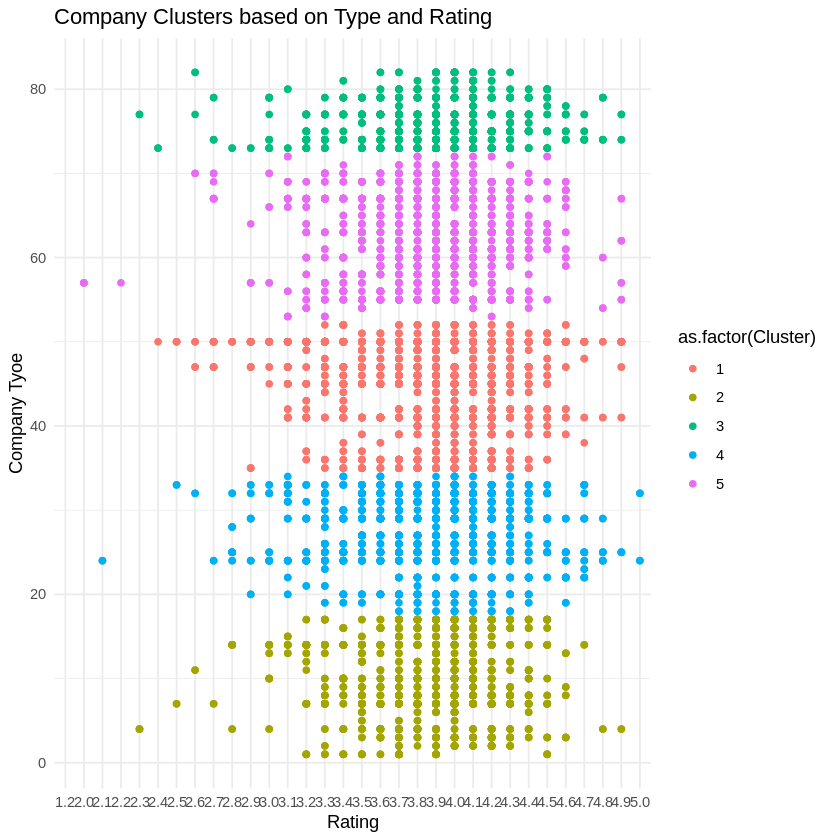

In [ ]:
####################       Company Reccomendation Model        ###############################


####### Lets create a company reccomendation model using clustering algorithm on Type and Ratings:
features <- df_encoded %>%
  select(Type_Label_Encoded, Rating)

hclust_model <- hclust(dist(features), method = "ward.D2")

k <- 5
clusters <- cutree(hclust_model, k)
df_encoded <- df_encoded %>%
  mutate(Cluster = clusters)

ggplot(df_encoded, aes(x = Rating, y = as.integer(Type_Label_Encoded), color = as.factor(Cluster))) +
  geom_point() +
  labs(
    x = "Rating",
    y = "Company Tyoe",
    title = "Company Clusters based on Type and Rating "
  ) +
  theme_minimal()


In [ ]:
#### Lets check for the name of the companies in each cluster:

cluster_names <- list()
for (i in 1:max(df_encoded$Cluster)) {
  cluster_names[[i]] <- df_encoded$company_name[df_encoded$Cluster == i]
}
for (i in 1:length(cluster_names)) {
  cat("Cluster", i, ":", paste(cluster_names[[i]], collapse = ", "), "\n")
}


Cluster 1 : TCS, Accenture, Cognizant, Wipro, Infosys, Capgemini, Tech Mahindra, HCLTech, Genpact, Amazon, Vodafone Idea, Flipkart, DXC Technology, HDFC Life, Bajaj Finserv, LTIMindtree, Mphasis, Sutherland Global Services, NTT DATA, ICICI Prudential Life Insurance, HCL Group, Udaan, L T Infotech, ITC, FIS, Hindustan Unilever, Amazon Development Centre India, TATA Steel, Hexaware Technologies, JSW Steel, Max Life Insurance, eClerx, Apollo Hospitals, JustDial, Omega Healthcare, Cyient, Bajaj Allianz Life Insurance, BigBasket, Indiamart Intermesh, Oyo Rooms, Atos Syntel, SBI Cards Payment Services, BNY Mellon, Coforge, Nagarro, Virtusa Consulting Services, ICICI Lombard General Insurance Company, GlobalLogic, UST, Schneider Electric, Samsung, Swiggy, L T Technology Services, SBI Life Insurance Company, Optum, Godrej Boyce Manufacturing, John Deere, Thermax Limited, Randstad, UnitedHealth, Automatic Data Processing ADP , CARS24, Persistent Systems, Atos, Cgi Group, Wipro Consumer Care Lig

                                  **End of the project**

